In [73]:
import numpy as np
import joblib
import pickle
from keras.layers import Input, Dense
from keras.models import Model, Sequential
from keras.layers import Dense, Activation, Flatten, Input
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping
from PIL import Image

In [74]:
x_train = np.load('Data/x_train_sample.npy')/255
y_train = np.load('Data/y_train_sample.npy')
x_test = np.load('Data/x_test_sample.npy')/255
y_test = np.load('Data/y_test_sample.npy')

In [75]:
print(x_train.shape)
print(y_train.shape)

(1800, 256, 256, 3)
(1800, 15)


https://towardsdatascience.com/applied-deep-learning-part-3-autoencoders-1c083af4d798

https://medium.com/analytics-vidhya/denoising-autoencoder-on-colored-images-using-tensorflow-17bf63e19dad

In [ ]:
model = Sequential()

In [ ]:
#1st convolution layer
model.add(Conv2D(512, (3, 3), padding='same', input_shape=(256,256,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), padding='same'))

#2nd convolution layer
model.add(Conv2D(128,(3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
#-------------------------
#3rd convolution layer
model.add(Conv2D(128,(3, 3), padding='same'))
model.add(Activation('relu'))
model.add(UpSampling2D((2, 2)))

#4rd convolution layer
model.add(Conv2D(512,(3, 3), padding='same'))
model.add(Activation('relu'))
model.add(UpSampling2D((2, 2)))

In [ ]:
model.add(Conv2D(3,(3, 3), padding='same'))
model.add(Activation('sigmoid'))

In [ ]:
model.summary()

In [ ]:
model.compile(optimizer='adadelta', loss='binary_crossentropy')

In [ ]:
model.fit(x_train[0:100],x_train[0:100],batch_size=50,epochs=3)

In [ ]:
filename = 'autoencoder'
joblib.dump(model,filename)

In [ ]:
model = joblib.load(filename)

https://stackabuse.com/autoencoders-for-image-reconstruction-in-python-and-keras/

In [76]:
import matplotlib.pyplot as plt
def show_image(x):
    plt.imshow(np.clip(x, 0, 1))

In [89]:
x_train[0]

array([[[0.5372549 , 0.5176471 , 0.5254902 ],
        [0.5647059 , 0.54509807, 0.5529412 ],
        [0.58431375, 0.5647059 , 0.57254905],
        ...,
        [0.50980395, 0.49019608, 0.49803922],
        [0.49803922, 0.47843137, 0.4862745 ],
        [0.53333336, 0.5137255 , 0.52156866]],

       [[0.5176471 , 0.49803922, 0.5058824 ],
        [0.52156866, 0.5019608 , 0.50980395],
        [0.52156866, 0.5019608 , 0.50980395],
        ...,
        [0.5019608 , 0.48235294, 0.49019608],
        [0.5294118 , 0.50980395, 0.5176471 ],
        [0.5764706 , 0.5568628 , 0.5647059 ]],

       [[0.5529412 , 0.53333336, 0.5411765 ],
        [0.5411765 , 0.52156866, 0.5294118 ],
        [0.5254902 , 0.5058824 , 0.5137255 ],
        ...,
        [0.5372549 , 0.5176471 , 0.5254902 ],
        [0.5294118 , 0.50980395, 0.5176471 ],
        [0.5294118 , 0.50980395, 0.5176471 ]],

       ...,

       [[0.4862745 , 0.4627451 , 0.48235294],
        [0.4862745 , 0.4627451 , 0.48235294],
        [0.4862745 , 0

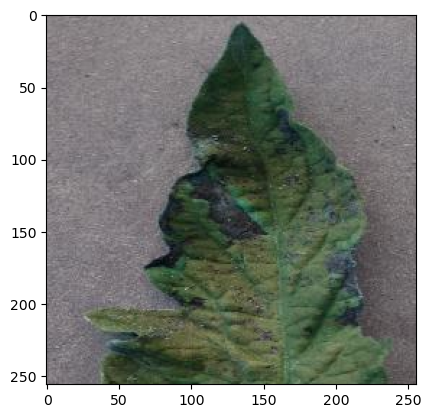

In [77]:
show_image(x_train[0])

In [78]:
from keras.layers import Dense, Flatten, Reshape, Input, InputLayer
from keras.models import Sequential, Model

In [79]:
def build_autoencoder(img_shape, code_size):
    # The encoder
    encoder = Sequential()
    encoder.add(InputLayer(img_shape))
    encoder.add(Flatten())
    encoder.add(Dense(code_size))

    # The decoder
    decoder = Sequential()
    decoder.add(InputLayer((code_size,)))
    decoder.add(Dense(np.prod(img_shape))) # np.prod(img_shape) is the same as 32*32*3, it's more generic than saying 3072
    decoder.add(Reshape(img_shape))

    return encoder, decoder

In [80]:
IMG_SHAPE = x_train.shape[1:]
encoder, decoder = build_autoencoder(IMG_SHAPE, 64)

inp = Input(IMG_SHAPE)
code = encoder(inp)
reconstruction = decoder(code)

autoencoder = Model(inp,reconstruction)
autoencoder.compile(optimizer='adamax', loss='mse')

print(autoencoder.summary())

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 256, 256, 3)]     0         
                                                                 
 sequential_7 (Sequential)   (None, 64)                12582976  
                                                                 
 sequential_8 (Sequential)   (None, 256, 256, 3)       12779520  
                                                                 
Total params: 25,362,496
Trainable params: 25,362,496
Non-trainable params: 0
_________________________________________________________________
None


In [81]:
history = autoencoder.fit(x=x_train, y=x_train, epochs=100,
                validation_data=[x_test, x_test])

Epoch 1/100
57/57 [==============================] - 10s 170ms/step - loss: 0.8676 - val_loss: 0.0302
Epoch 2/100
57/57 [==============================] - 10s 179ms/step - loss: 0.0275 - val_loss: 0.0272
Epoch 3/100
57/57 [==============================] - 10s 178ms/step - loss: 0.0267 - val_loss: 0.0271
Epoch 4/100
57/57 [==============================] - 9s 164ms/step - loss: 0.0267 - val_loss: 0.0271
Epoch 5/100
57/57 [==============================] - 9s 153ms/step - loss: 0.0267 - val_loss: 0.0271
Epoch 6/100
57/57 [==============================] - 9s 150ms/step - loss: 0.0267 - val_loss: 0.0271
Epoch 7/100
57/57 [==============================] - 9s 157ms/step - loss: 0.0266 - val_loss: 0.0271
Epoch 8/100
57/57 [==============================] - 9s 160ms/step - loss: 0.0266 - val_loss: 0.0271
Epoch 9/100
57/57 [==============================] - 10s 168ms/step - loss: 0.0266 - val_loss: 0.0271
Epoch 10/100
57/57 [==============================] - 10s 174ms/step - loss: 0.0266 - v

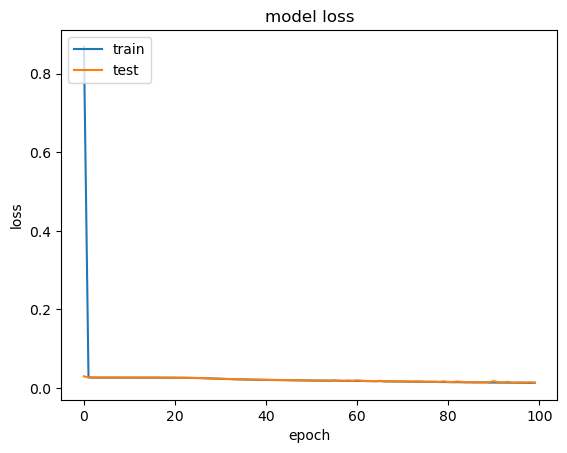

In [82]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

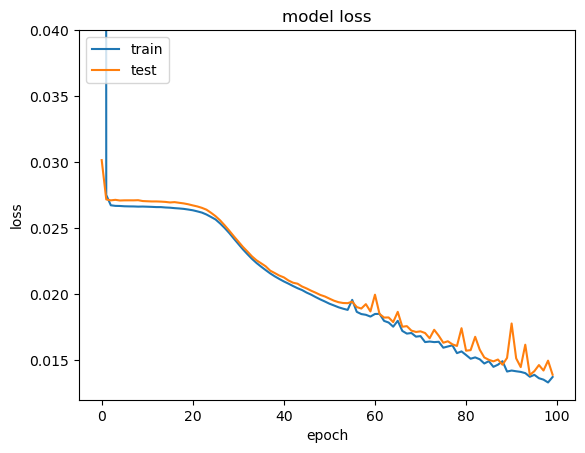

In [87]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.ylim(0.012, 0.04)
plt.show()

1/1 [==============================] - 0s 91ms/step


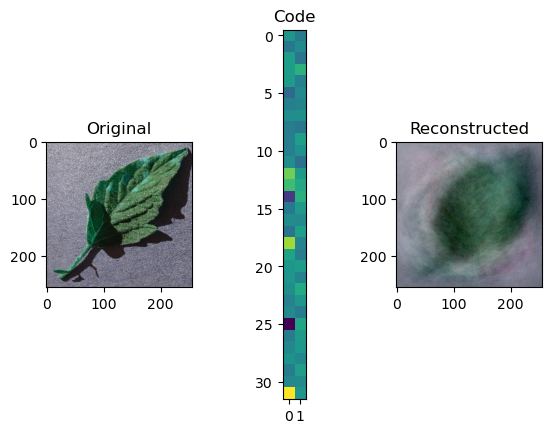

1/1 [==============================] - 0s 24ms/step


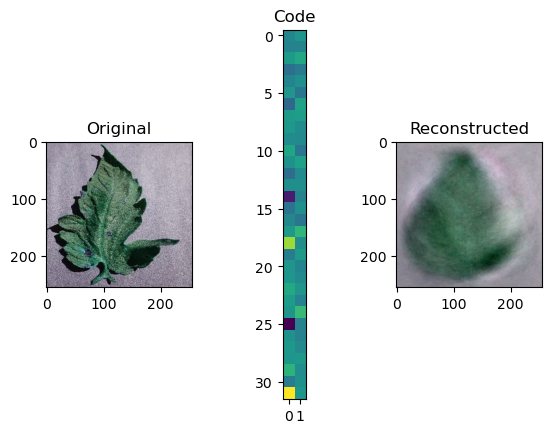

1/1 [==============================] - 0s 22ms/step


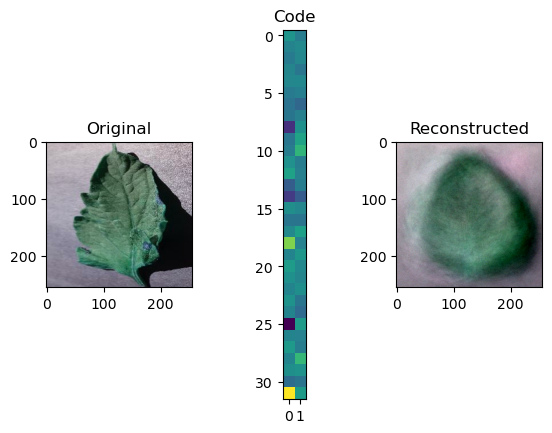

1/1 [==============================] - 0s 25ms/step


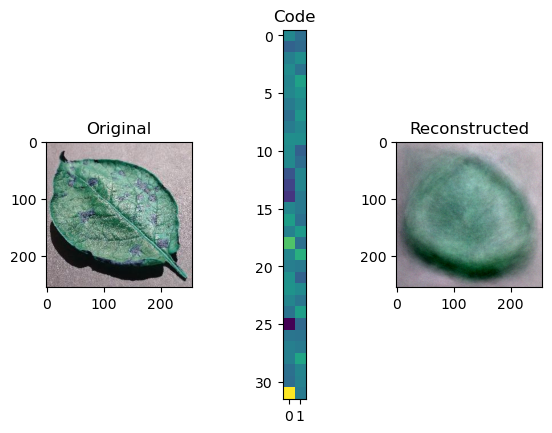

1/1 [==============================] - 0s 21ms/step


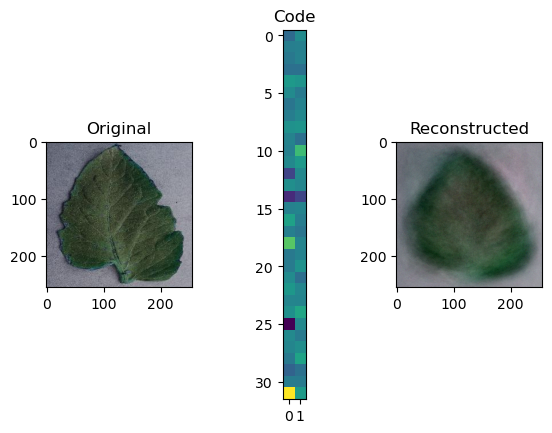

In [88]:
def visualize(img,encoder,decoder):
    """Draws original, encoded and decoded images"""
    # img[None] will have shape of (1, 32, 32, 3) which is the same as the model input
    code = encoder.predict(img[None])[0]
    reco = decoder.predict(code[None])[0]

    plt.subplot(1,3,1)
    plt.title("Original")
    show_image(img)

    plt.subplot(1,3,2)
    plt.title("Code")
    plt.imshow(code.reshape([code.shape[-1]//2,-1]))

    plt.subplot(1,3,3)
    plt.title("Reconstructed")
    show_image(reco)
    plt.show()

for i in range(5):
    img = x_test[i]
    visualize(img,encoder,decoder)

## Image denoising

In [90]:
def apply_gaussian_noise(X, sigma=0.1):
    noise = np.random.normal(loc=0.0, scale=sigma, size=X.shape)
    return X + noise

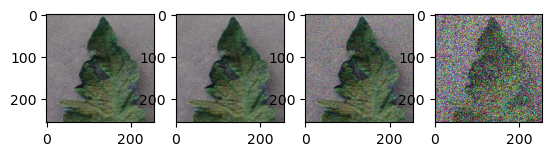

In [91]:
plt.subplot(1,4,1)
show_image(x_train[0])
plt.subplot(1,4,2)
show_image(apply_gaussian_noise(x_train[:1],sigma=0.01)[0])
plt.subplot(1,4,3)
show_image(apply_gaussian_noise(x_train[:1],sigma=0.1)[0])
plt.subplot(1,4,4)
show_image(apply_gaussian_noise(x_train[:1],sigma=0.5)[0])

In [92]:
code_size = 100

# We can use bigger code size for better quality
encoder, decoder = build_autoencoder(IMG_SHAPE, code_size=code_size)

inp = Input(IMG_SHAPE)
code = encoder(inp)
reconstruction = decoder(code)

autoencoder = Model(inp, reconstruction)
autoencoder.compile('adamax', 'mse')

for i in range(25):
    print("Epoch %i/25, Generating corrupted samples..."%(i+1))
    x_train_noise = apply_gaussian_noise(x_train)
    x_test_noise = apply_gaussian_noise(x_test)

    # We continue to train our model with new noise-augmented data
    autoencoder.fit(x=x_train_noise, y=x_train, epochs=1,
                    validation_data=[x_test_noise, x_test])

Epoch 1/25, Generating corrupted samples...
57/57 [==============================] - 20s 312ms/step - loss: 1.6908 - val_loss: 0.0398
Epoch 2/25, Generating corrupted samples...
57/57 [==============================] - 21s 316ms/step - loss: 0.0293 - val_loss: 0.0274
Epoch 3/25, Generating corrupted samples...
57/57 [==============================] - 21s 331ms/step - loss: 0.0269 - val_loss: 0.0273
Epoch 4/25, Generating corrupted samples...
57/57 [==============================] - 24s 381ms/step - loss: 0.0268 - val_loss: 0.0272
Epoch 5/25, Generating corrupted samples...
57/57 [==============================] - 22s 341ms/step - loss: 0.0267 - val_loss: 0.0271
Epoch 6/25, Generating corrupted samples...
57/57 [==============================] - 22s 323ms/step - loss: 0.0267 - val_loss: 0.0271
Epoch 7/25, Generating corrupted samples...
57/57 [==============================] - 22s 347ms/step - loss: 0.0266 - val_loss: 0.0271
Epoch 8/25, Generating corrupted samples...
57/57 [===========

1/1 [==============================] - 0s 102ms/step


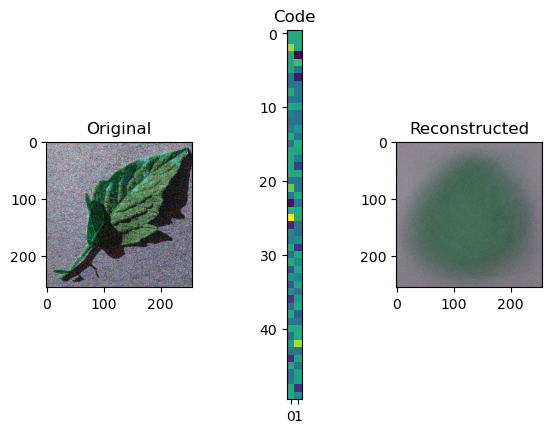

1/1 [==============================] - 0s 27ms/step


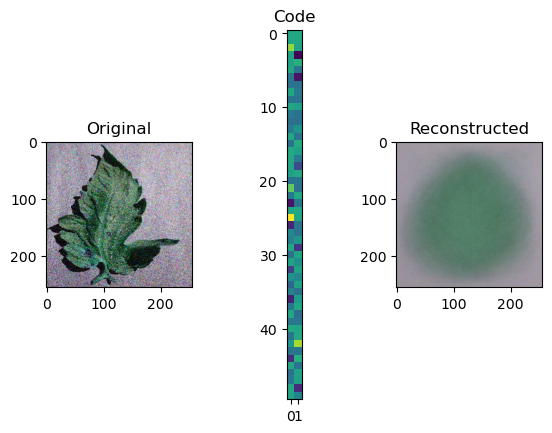

1/1 [==============================] - 0s 24ms/step


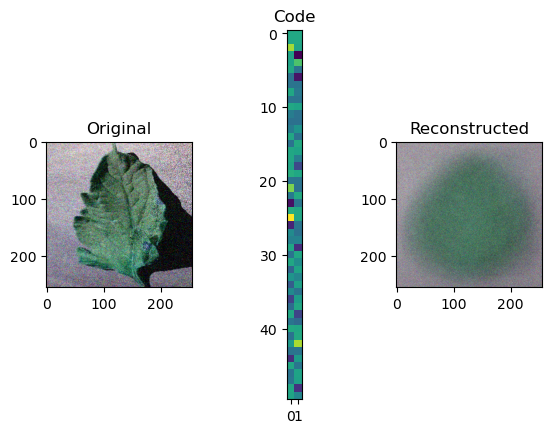

1/1 [==============================] - 0s 36ms/step


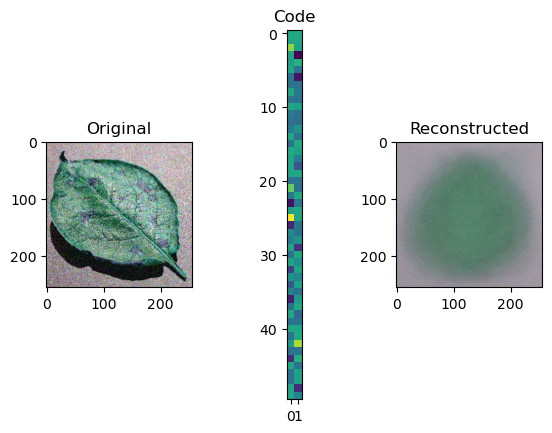

1/1 [==============================] - 0s 24ms/step


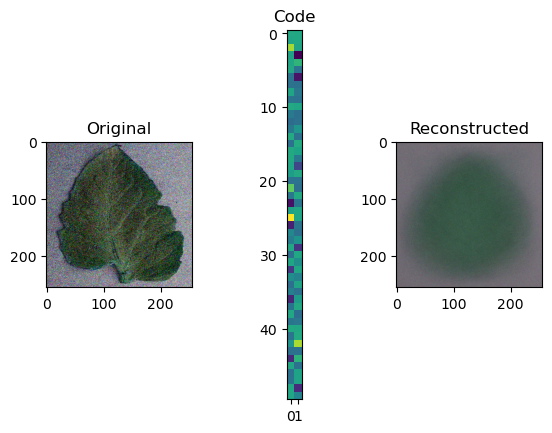

In [93]:
x_test_noise = apply_gaussian_noise(x_test)
for i in range(5):
    img = x_test_noise[i]
    visualize(img,encoder,decoder)
